In [1]:
import glob
import os 

import pandas as pd

In [2]:
BASE_DIR="../data/fashion-small/"

images_dir = f"{BASE_DIR}/images"
csv_file = f"{BASE_DIR}/styles.csv"


In [3]:
#read csv
all_metadata = pd.read_csv(csv_file, usecols=['id', 'gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour', 'season', 'year', 'usage', 'productDisplayName'])
print(all_metadata.shape)

(44446, 10)


In [4]:
#all images in directory
image_list = glob.glob(f"{images_dir}/*")
print(f"total {len(image_list)} images found in directory")

total 44441 images found in directory


In [5]:
#list first 10 rows
all_metadata.head(10)

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt
5,1855,Men,Apparel,Topwear,Tshirts,Grey,Summer,2011.0,Casual,Inkfruit Mens Chain Reaction T-shirt
6,30805,Men,Apparel,Topwear,Shirts,Green,Summer,2012.0,Ethnic,Fabindia Men Striped Green Shirt
7,26960,Women,Apparel,Topwear,Shirts,Purple,Summer,2012.0,Casual,Jealous 21 Women Purple Shirt
8,29114,Men,Accessories,Socks,Socks,Navy Blue,Summer,2012.0,Casual,Puma Men Pack of 3 Socks
9,30039,Men,Accessories,Watches,Watches,Black,Winter,2016.0,Casual,Skagen Men Black Watch


In [6]:
all_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44446 entries, 0 to 44445
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44446 non-null  int64  
 1   gender              44446 non-null  object 
 2   masterCategory      44446 non-null  object 
 3   subCategory         44446 non-null  object 
 4   articleType         44446 non-null  object 
 5   baseColour          44431 non-null  object 
 6   season              44425 non-null  object 
 7   year                44445 non-null  float64
 8   usage               44129 non-null  object 
 9   productDisplayName  44439 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


### there are null values in dataframe. !! 

In [7]:
#count missing values
all_metadata.isnull().sum()

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [14]:
#drop rows with at least one null value. () 
#alternatively null columns would be filled with mean(for numeric columns) or random values.
all_metadata = all_metadata.dropna()

In [15]:
all_metadata.isnull().sum()

id                    0
gender                0
masterCategory        0
subCategory           0
articleType           0
baseColour            0
season                0
year                  0
usage                 0
productDisplayName    0
dtype: int64

### compare ids in styles.csv and image files in directory

In [16]:
#visualize random images with metadata
print(f"found {len(all_metadata.index)} rows in csv and {len(image_list)} images in ")

found 44099 rows in csv and 44441 images in 


In [17]:
ids_in_metadata = all_metadata['id'].tolist()
ids_in_directory = [int(image_path.split('/')[-1].split('.')[0]) for image_path in image_list]

In [18]:
#ids exists in metadata only
print("following ids exists in metadata only:")
print(set(ids_in_metadata) - set(ids_in_directory))
# 5 missing images

following ids exists in metadata only:
{39425, 39401, 39403, 39410, 12347}


In [19]:
print("following ids exists in directory only:") #after removing null values
print(set(ids_in_directory) - set(ids_in_metadata))

following ids exists in directory only:
{49152, 49153, 49154, 49155, 49156, 49157, 49164, 43113, 43116, 43119, 43120, 43122, 51332, 51334, 12447, 12448, 12449, 12450, 12451, 12452, 57543, 57544, 57545, 57547, 57550, 57554, 57555, 57558, 57560, 57561, 57563, 57569, 57570, 57572, 57573, 57575, 57576, 57578, 57580, 57581, 57607, 57608, 57609, 57610, 57611, 57613, 30991, 57616, 57617, 30992, 57622, 57624, 57627, 57628, 57629, 55583, 57635, 57640, 57645, 57646, 57647, 57649, 57652, 57653, 57669, 57670, 57672, 57673, 57674, 57676, 57678, 57681, 57685, 57687, 57690, 57692, 57694, 57698, 57700, 57702, 57703, 57704, 57709, 57713, 57714, 57715, 57716, 57719, 57720, 57724, 57725, 57727, 57728, 57729, 41347, 57731, 57732, 57733, 57734, 57735, 57736, 18826, 41355, 57737, 41357, 57738, 57745, 57746, 57747, 57754, 57755, 57757, 57758, 57759, 57760, 57762, 57763, 57767, 57768, 57773, 57776, 57777, 57778, 57779, 57780, 57781, 57783, 57784, 57785, 57787, 57789, 57791, 57792, 57793, 57798, 57800, 57802, 

In [20]:
all_metadata.shape

(44099, 10)

## visualize data distributions

2012.0    16270
2011.0    13651
2016.0     5999
2015.0     2775
2017.0     2650
2013.0     1206
2010.0      846
2018.0      404
2014.0      236
2019.0       33
2009.0       20
2008.0        7
2007.0        2
Name: year, dtype: int64


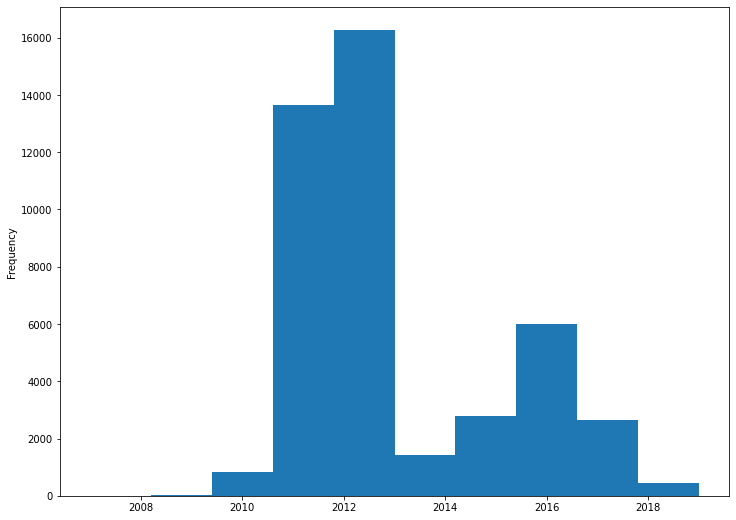

In [21]:
#year distribution
print(all_metadata["year"].value_counts())
all_metadata["year"].plot(kind='hist', figsize=(12,9))

**********
COLUMN: gender
Men       22127
Women     18358
Unisex     2129
Boys        830
Girls       655
Name: gender, dtype: int64


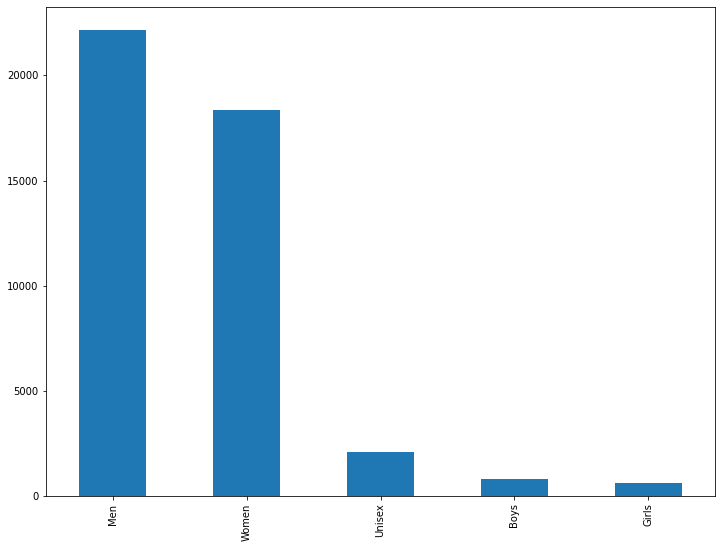

**********
COLUMN: masterCategory
Apparel           21369
Accessories       11259
Footwear           9200
Personal Care      2140
Free Items          105
Sporting Goods       25
Home                  1
Name: masterCategory, dtype: int64


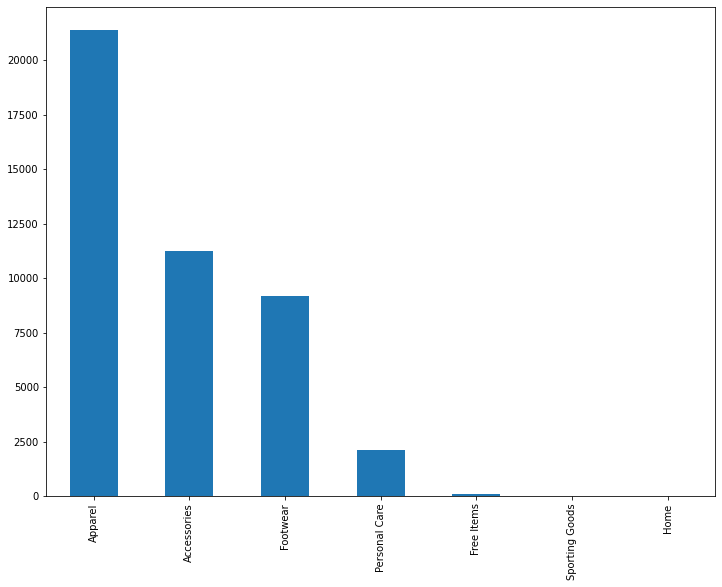

**********
COLUMN: subCategory
Topwear                     15390
Shoes                        7324
Bags                         3053
Bottomwear                   2686
Watches                      2542
Innerwear                    1806
Jewellery                    1080
Eyewear                      1073
Fragrance                    1002
Sandal                        961
Wallets                       925
Flip Flops                    915
Belts                         811
Socks                         698
Dress                         478
Loungewear and Nightwear      464
Saree                         427
Lips                          425
Headwear                      293
Nails                         278
Makeup                        263
Ties                          258
Accessories                   143
Scarves                       118
Cufflinks                     108
Apparel Set                   106
Free Gifts                    104
Stoles                         90
Skin             

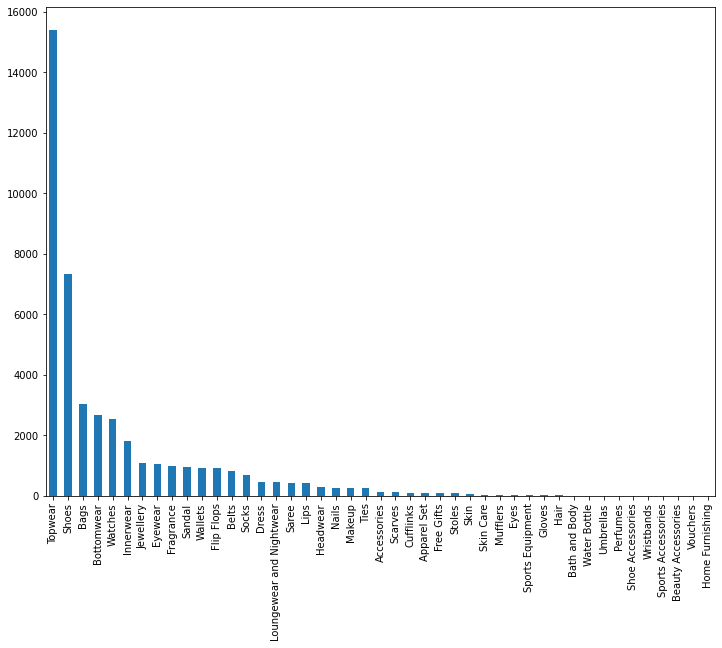

**********
COLUMN: articleType
Tshirts                7069
Shirts                 3214
Casual Shoes           2846
Watches                2542
Sports Shoes           2016
                       ... 
Suits                     1
Shoe Laces                1
Ipad                      1
Body Wash and Scrub       1
Cushion Covers            1
Name: articleType, Length: 142, dtype: int64


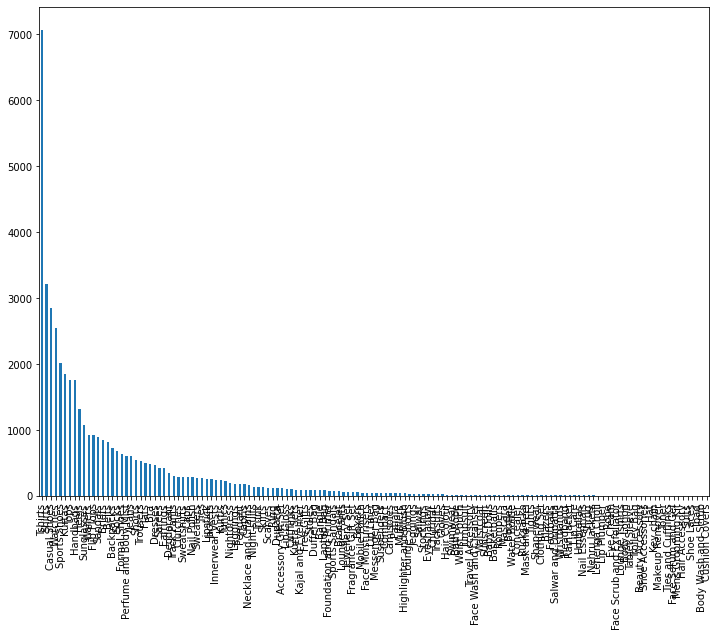

**********
COLUMN: baseColour
Black                9704
White                5499
Blue                 4911
Brown                3440
Grey                 2735
Red                  2437
Green                2104
Pink                 1825
Navy Blue            1786
Purple               1615
Silver               1089
Yellow                777
Beige                 745
Gold                  622
Maroon                577
Orange                523
Olive                 409
Multi                 394
Cream                 384
Steel                 315
Charcoal              228
Peach                 185
Off White             182
Skin                  163
Lavender              160
Grey Melange          146
Khaki                 139
Magenta               128
Teal                  119
Tan                   112
Mustard                97
Bronze                 89
Copper                 83
Turquoise Blue         69
Rust                   65
Burgundy               44
Metallic               41
Coffee B

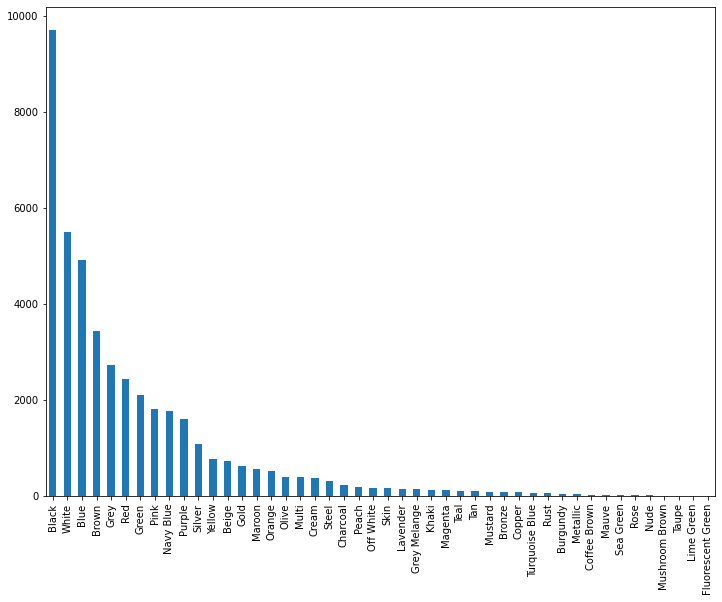

**********
COLUMN: season
Summer    21444
Fall      11428
Winter     8513
Spring     2714
Name: season, dtype: int64


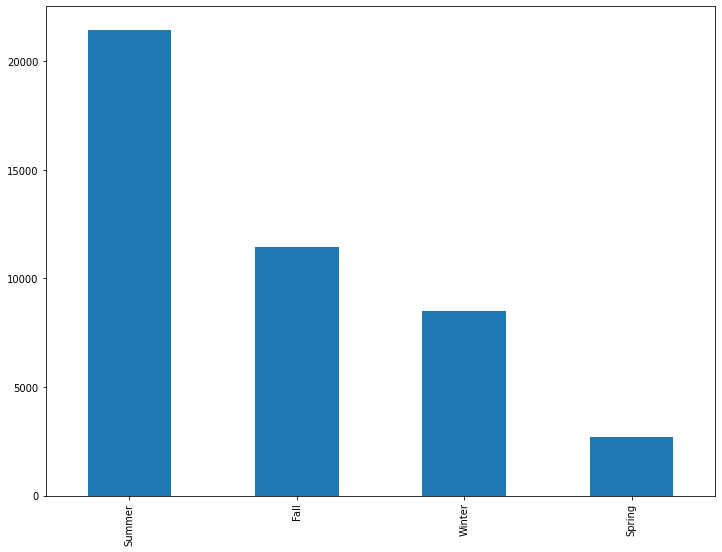

**********
COLUMN: usage
Casual          34405
Sports           4004
Ethnic           3208
Formal           2359
Smart Casual       67
Party              29
Travel             26
Home                1
Name: usage, dtype: int64


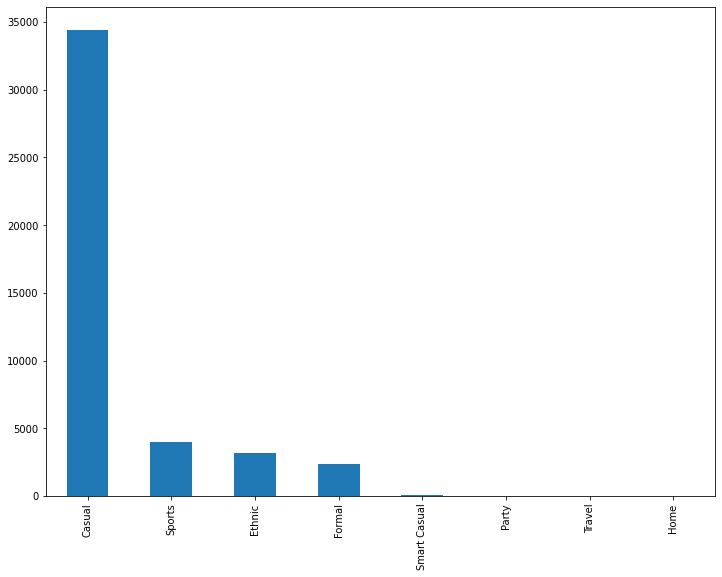

In [22]:
#gender distribution
#all_metadata["gender"].plot(kind='hist', figsize=(12,9))
import matplotlib.pyplot as plt
%matplotlib inline

for col in ['gender', 'masterCategory', 'subCategory', 'articleType', 'baseColour',
       'season', 'usage']:
    print("*"*10)
    print(f"COLUMN: {col}")
    print(all_metadata[col].value_counts())
    all_metadata[col].value_counts().plot(kind='bar', figsize=(12,9))
    plt.show()

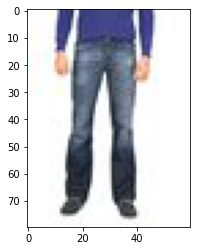

In [24]:
#plot sample image
from matplotlib import pyplot as plt
plt.imshow(plt.imread(image_list[40]))
plt.show()